# Monte Carlo Simulation

Monte Carlo algorithm to simulate the equilibrium distribution of the Ising model in two dimensions just as done in class. Consider a square lattice with $N \times N$ sites, in which each lattice site $(i,j)$ is occupied by a spin variable adopting the values $S_{ij} = \pm 1S$.

- The energy of a given configuration $\{ S_{ij} \}$ is given by,
$$E\left(\left\{S_{i j}\right\}\right)=-J \sum_{<n . n .>} S_{i j} S_{k l}$$ 
- Dimensionless variables $J^{\prime} = J/k_{B}T$
- Periodic boundary conditions in both spatial directions. 

Average energy per spin 
$$\frac{\langle E \rangle}{N^{2}}$$
and the total magnetization per spin 
$$\langle M \rangle = \frac{1}{N^{2}} \langle \sum_{i,j} S_{i,j} \rangle$$

In [1]:
import time
import numpy as np
from PIL import Image
from numba import jit, njit
from IPython.display import display, clear_output

Cool fact: running this simulation with Numba's JIT compiler is around 200-300 times faster. 100 million iterations with a 1024x1024 grid takes around one minute

In [4]:
@njit
def compute_M_avg(lattice):
    N = lattice.shape[0]
    return np.sum(lattice)/N**2


@njit
def compute_E_avg(lattice, J):
    N = lattice.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            E += get_ΔE(i,j)
    return E/N**2

    
@njit
def get_ΔE(i, j):
    top = lattice[(N-1) if (i==0) else (i-1)][j]
    bottom = lattice[(0) if (i==N-1) else (i+1)][j]
    right = lattice[i][(N-1) if (j==0) else (j-1)]
    left = lattice[i][(0) if (j==N-1) else (j+1)]
    ΔE = 2 * lattice[i][j] * (top + bottom + left + right) 
    return ΔE


@njit
def compute_step(lattice, J):
    i = np.random.randint(N)
    j = np.random.randint(N)
    ΔE = get_ΔE(i, j)
    if (ΔE < 0):
        lattice[i][j] = - lattice[i][j] # flip spin
    else:
        if (np.random.ranf() < np.exp(- ΔE * J)):
            lattice[i][j] = - lattice[i][j]
    return lattice


@njit
def run_sim(lattice, snapshots, N_iter, J=1):
    N = lattice.shape[0]
    idx = 0
    for i in range(N_iter):
        lattice = compute_step(lattice, J)  
        if (i % (N*N)) == 0: # apparently N*N is much faster than N**2
            snapshots[idx] = lattice
            idx = idx + 1
    return lattice, snapshots


J = 0.5
N = 1024
N_cycles = 1000
N_iter = N_cycles * N**2

snapshot_arr = np.zeros((N_cycles, N, N))

lattice = np.random.choice([-1, 1], size = (N, N))

lattice_f, snapshots_f = run_sim(lattice=lattice, snapshots=snapshot_arr, N_iter=N_iter, J=J)

E = compute_E_avg(lattice=lattice_f, J=J)
M = compute_M_avg(lattice=lattice_f)

print("Finished after {} iterations \n".format(N_iter))
print("Energy: {:.4f} \nMagnetization = {:.4f}".format(E,M))

Finished after 1048576000 iterations 

Energy: 6.7302 
Magnetization = 0.0796


### Results With $J = 0.4$

- Energy: 4.4253
- Magnetization = -0.0032

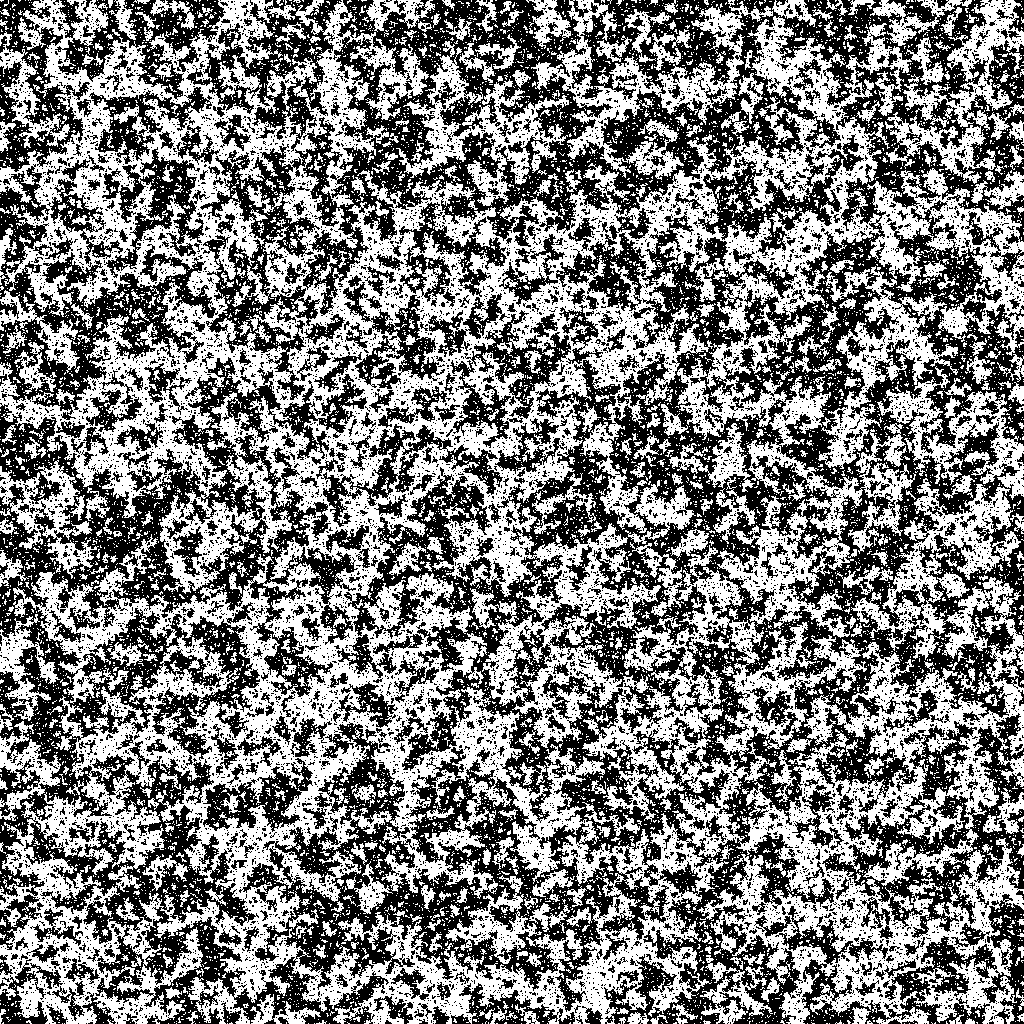

In [3]:
for i in range(N_cycles):
    clear_output(wait=True)
    display(Image.fromarray(np.uint8((snapshots_f[i] + 1) * 0.5 * 255)))

### Results With $J = 0.5$

- Energy: 6.7302 
- Magnetization = 0.0796

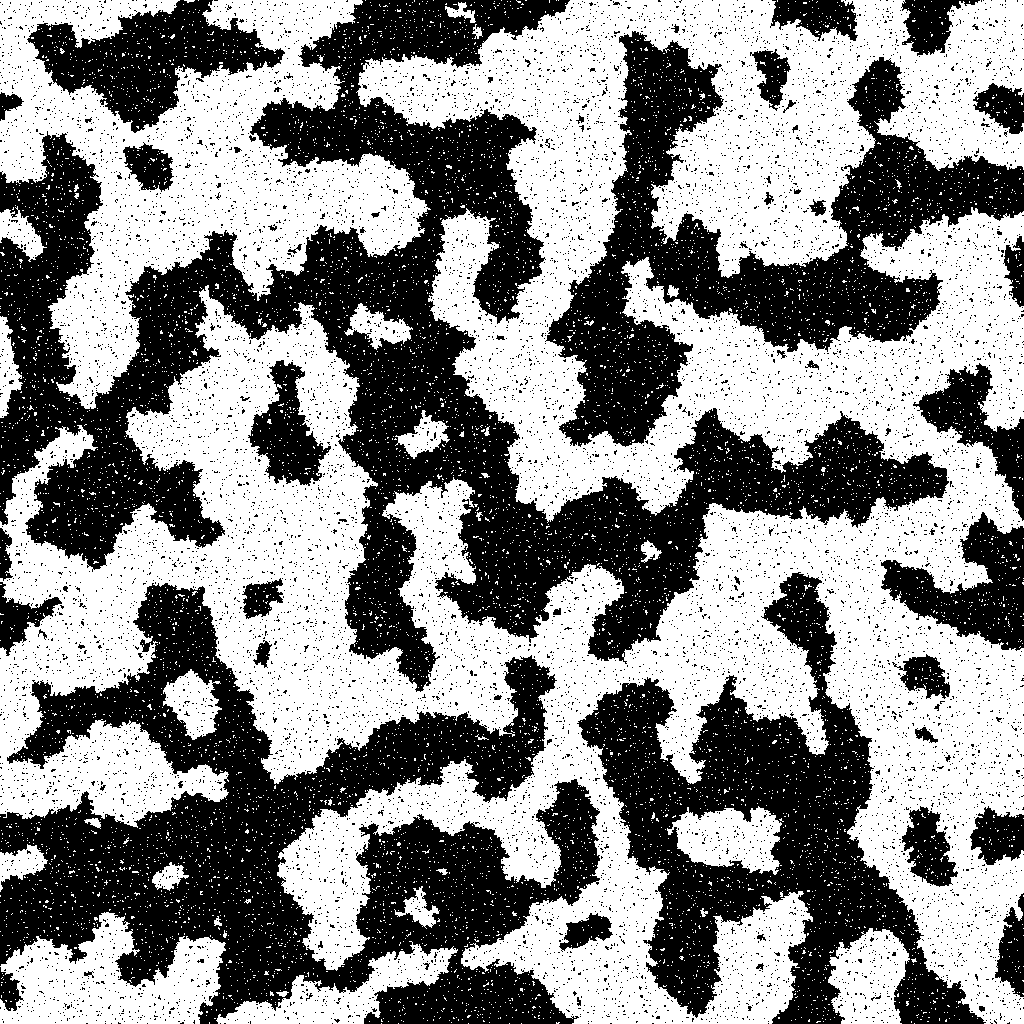

In [5]:
for i in range(N_cycles):
    clear_output(wait=True)
    display(Image.fromarray(np.uint8((snapshots_f[i] + 1) * 0.5 * 255)))